In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 부동산 허위매물 분류 해커톤/데이터/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 부동산 허위매물 분류 해커톤/데이터/test.csv')

## 1. 데이터 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [ ]:
train.isnull().sum()

,0
ID,0
매물확인방식,0
보증금,0
월세,0
전용면적,787
해당층,229
총층,16
방향,0
방수,16
욕실수,18


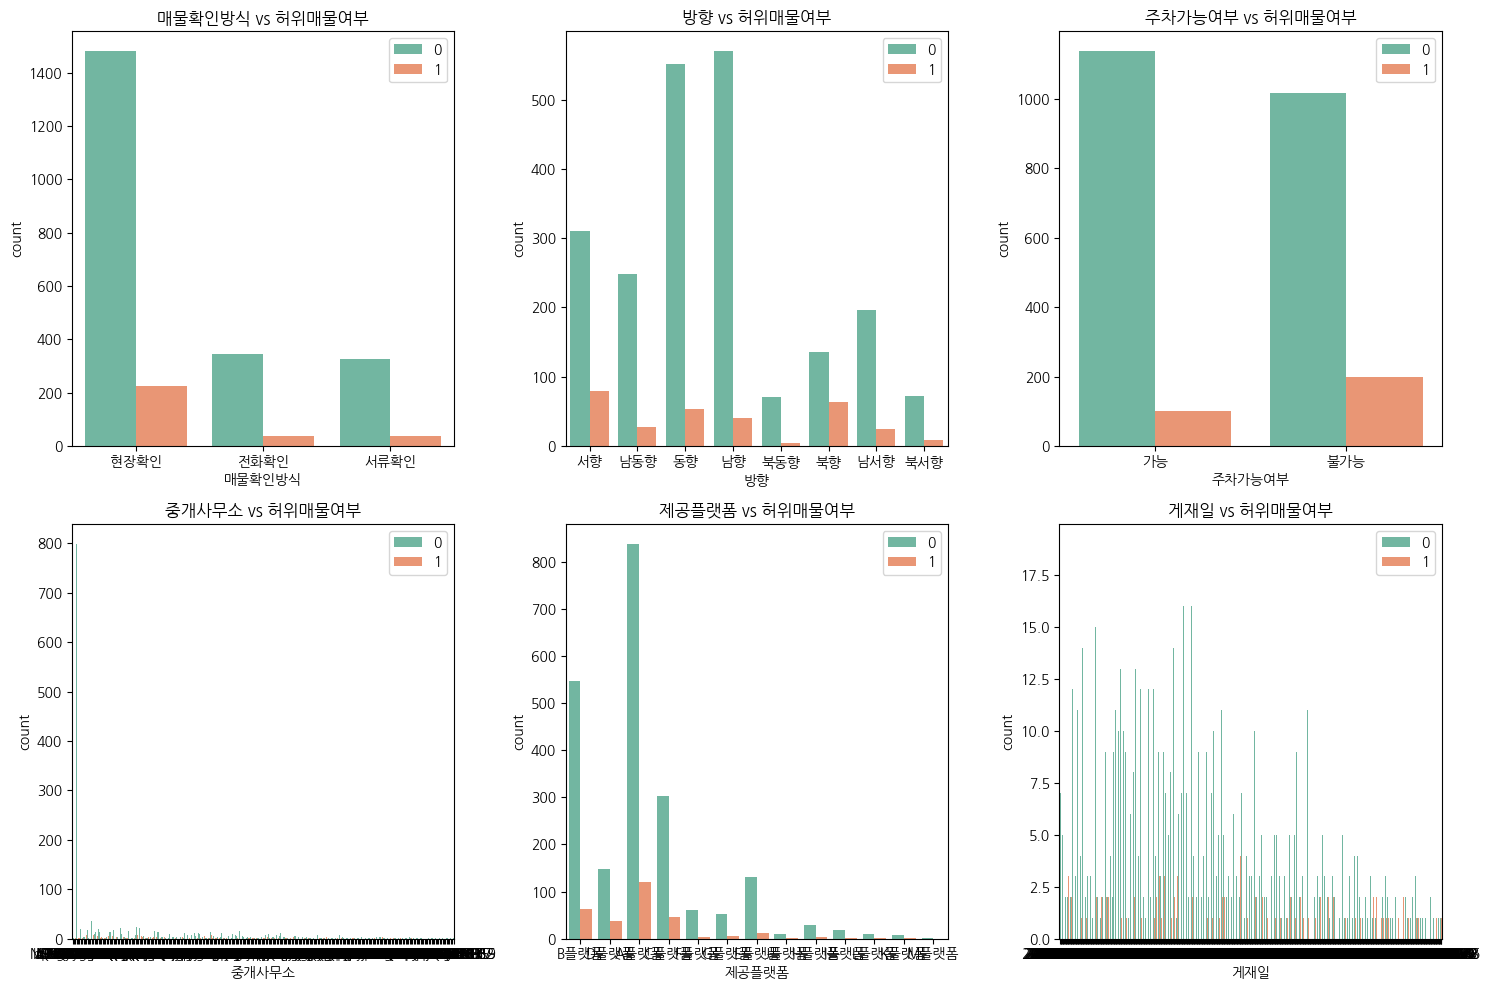

In [ ]:
plt.figure(figsize = (15, 10))
for ind, val in enumerate(['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼', '게재일']):
    plt.subplot(2,3, ind + 1)
    sns.countplot(data = train, x = val, hue = '허위매물여부', palette = 'Set2')
    plt.legend(fontsize=10)
    plt.title(f'{val} vs 허위매물여부')

plt.tight_layout()
plt.show()

In [ ]:
train['허위매물여부'].value_counts()

,count
허위매물여부,
0,2154
1,298


<ipython-input-18-6ff26c71f73f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '매물확인방식', palette = 'Set2')


Text(0.5, 1.0, '매물확인방식')

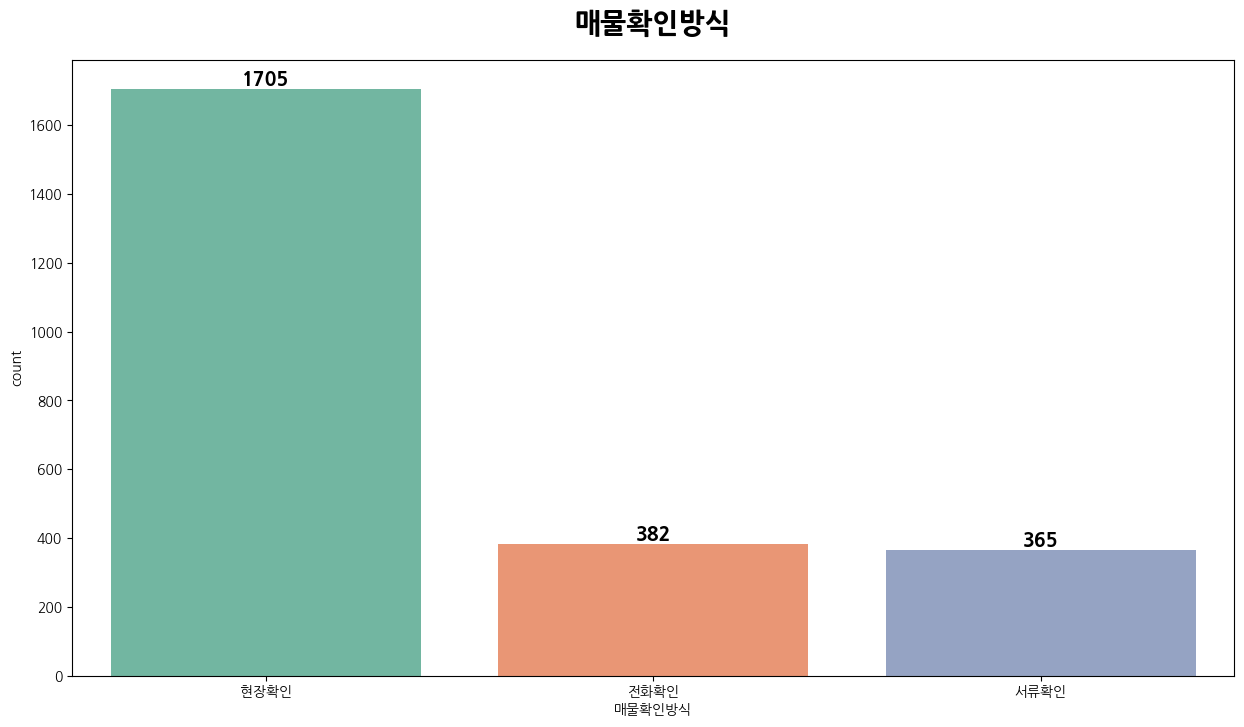

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '매물확인방식', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("매물확인방식",fontweight="black",size=20,pad=20)

In [ ]:
count_per_category = train.groupby('매물확인방식')['허위매물여부'].value_counts().unstack(fill_value=0)

# 비율 계산
ratio_per_category = count_per_category.div(count_per_category.sum(axis=1), axis=0)

# 결과 출력
print("개수:")
print(count_per_category)

print("\n비율:")
print(ratio_per_category)

개수:
허위매물여부     0    1
매물확인방식           
서류확인     327   38
전화확인     346   36
현장확인    1481  224

비율:
허위매물여부         0         1
매물확인방식                    
서류확인    0.895890  0.104110
전화확인    0.905759  0.094241
현장확인    0.868622  0.131378


In [ ]:
train['보증금'].describe()

,보증금
count,2.452000e+03
mean,1.574188e+08
std,1.212794e+08
min,5.000000e+06
25%,7.500000e+07
50%,1.325000e+08
75%,1.890000e+08
max,4.090000e+08


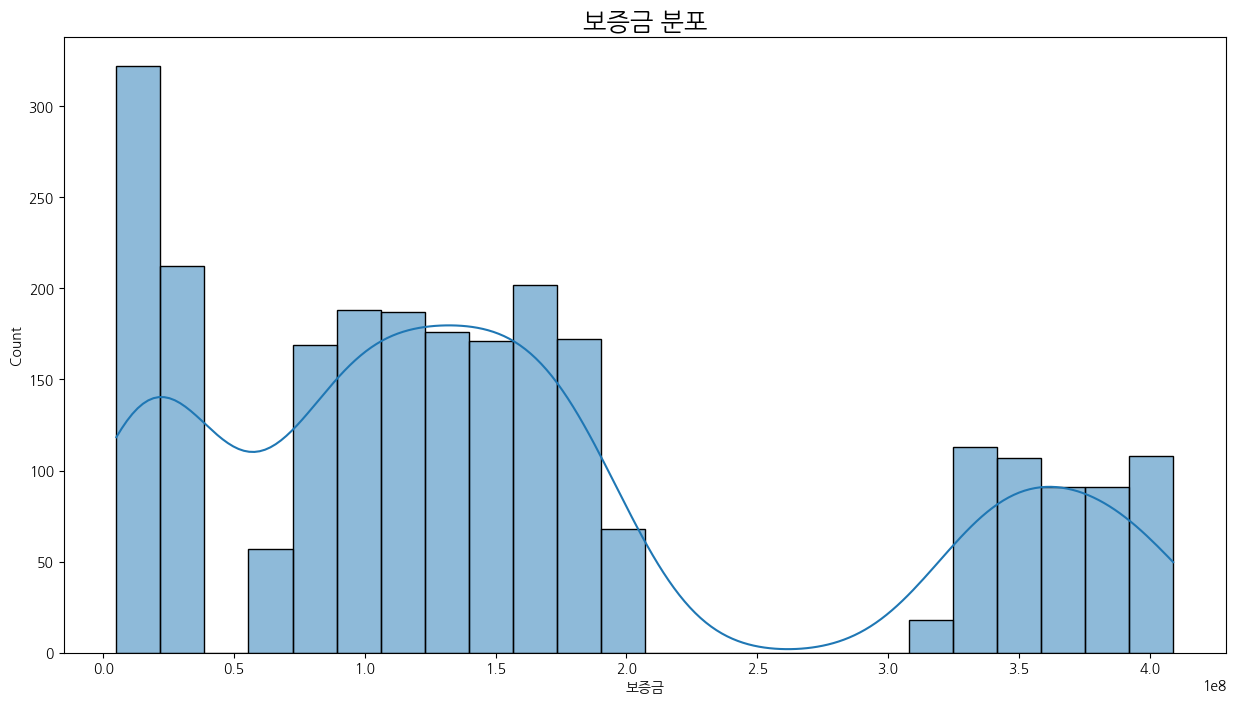

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = '보증금', kde = True)
plt.title('보증금 분포', size = 18)
plt.show()

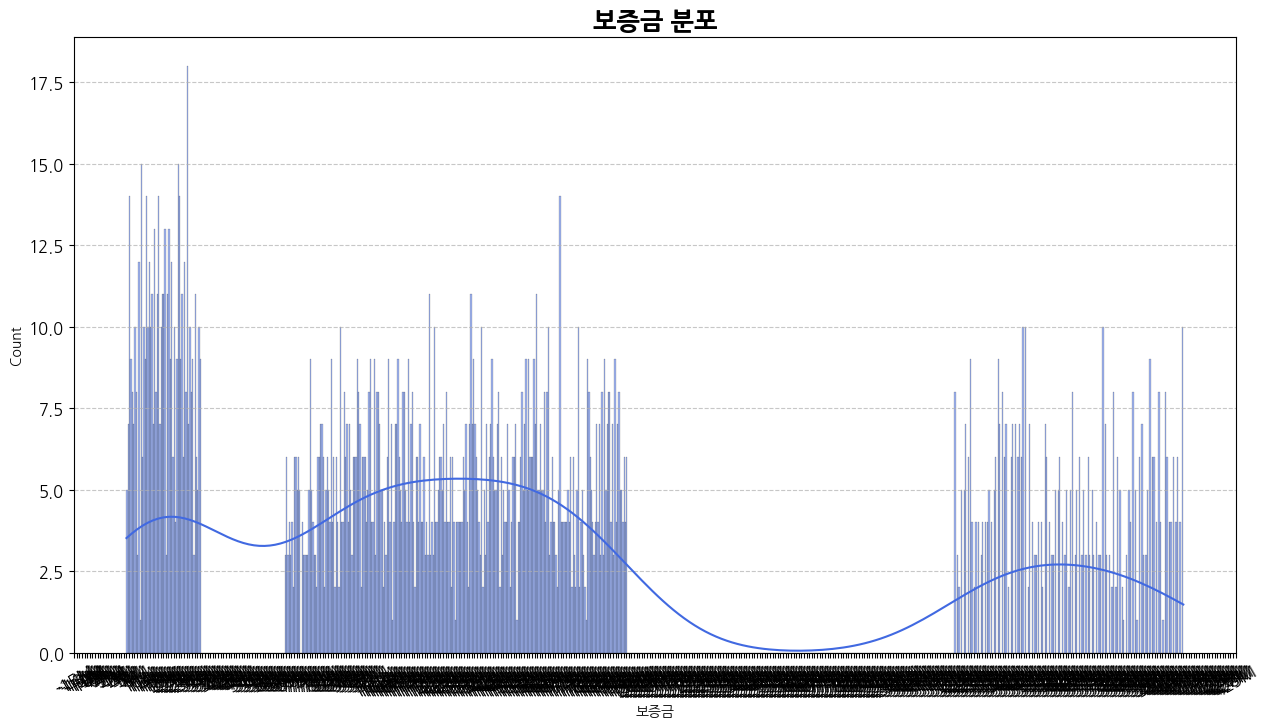

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(15, 8))

sns.histplot(data=train, x='보증금', kde=True, binwidth=500000, color="royalblue", edgecolor='black')
plt.title('보증금 분포', size=18, fontweight='bold')

# x축 눈금 조정: 100만 원 단위로 표시
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MultipleLocator(1000000))  # 100만 원 단위로 눈금 설정
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))  # '1M', '2M' 형식으로 변환

# x축 라벨 회전 조정 (더 잘 보이게)
plt.xticks(rotation=30, fontsize=12)

# y축 라벨도 보기 쉽게 조정
plt.yticks(fontsize=12)

# 테두리 스타일 정리
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 가독성을 높이기 위해 y축 그리드 추가

plt.show()


In [ ]:
train['월세'].describe()

,월세
count,2452.000000
mean,380420.065253
std,206425.413601
min,0.000000
25%,200000.000000
50%,380000.000000
75%,550000.000000
max,750000.000000


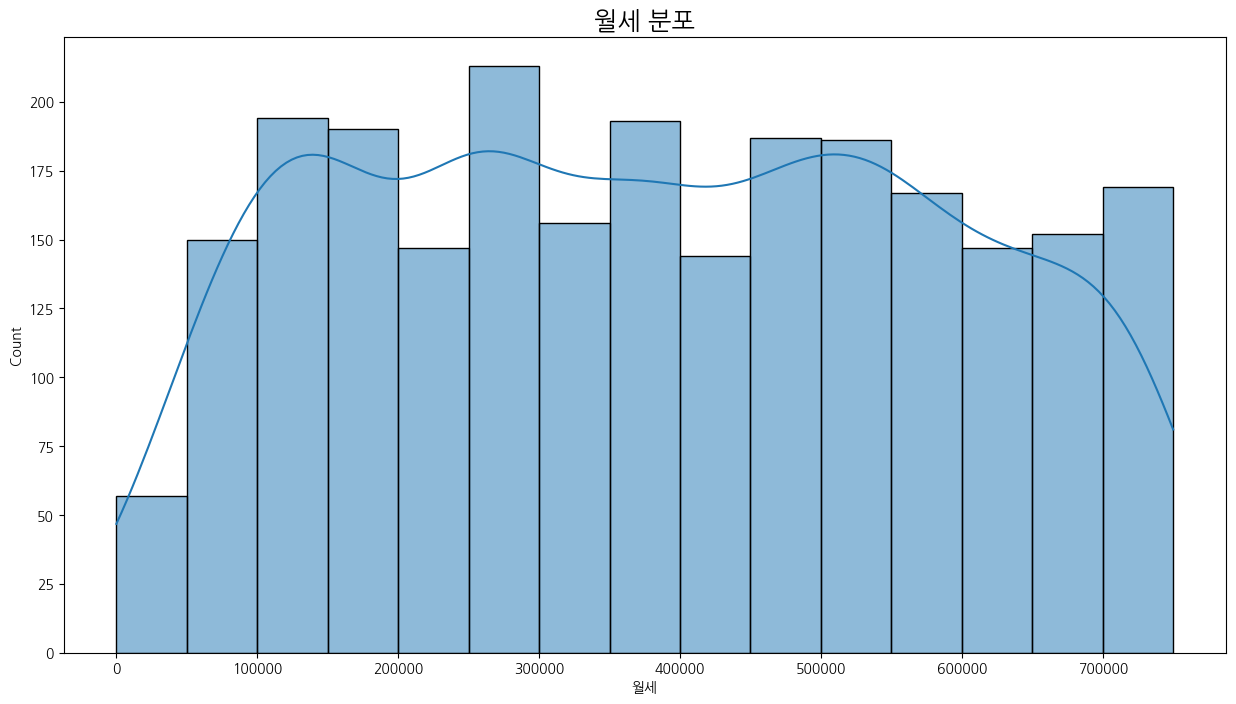

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = '월세', kde = True)
plt.title('월세 분포', size = 18)
plt.show()

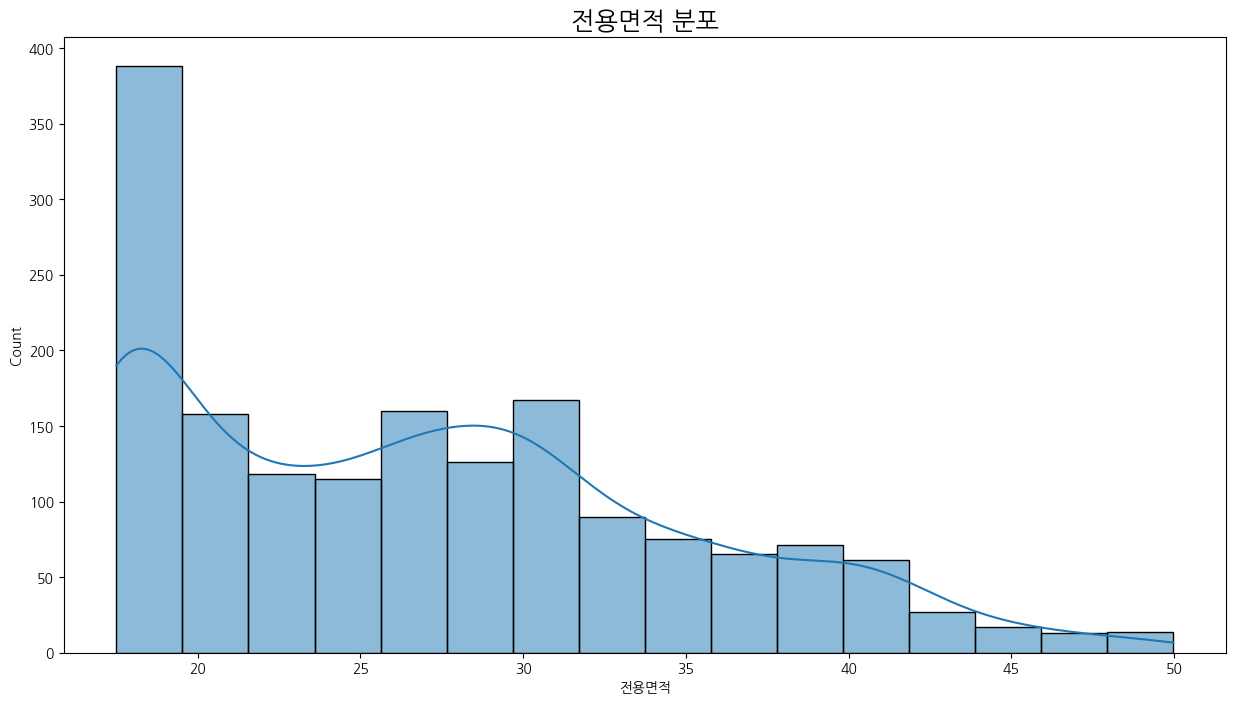

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = '전용면적', kde = True)
plt.title('전용면적 분포', size = 18)
plt.show()

In [ ]:
train['전용면적'].describe()

,전용면적
count,1665.000000
mean,27.009628
std,7.951757
min,17.500000
25%,19.800000
50%,26.400000
75%,32.110000
max,49.970000


<ipython-input-30-12dcd811fce6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '해당층', palette = 'Set2')


Text(0.5, 1.0, '해당층')

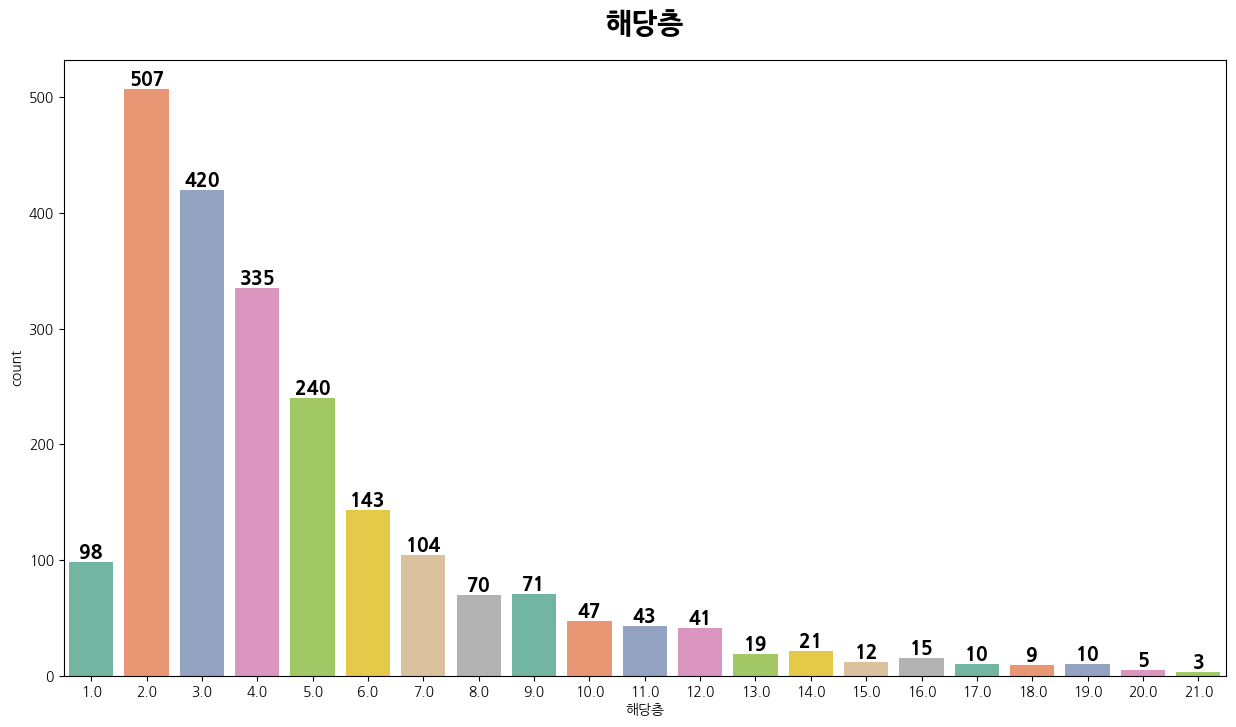

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '해당층', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("해당층",fontweight="black",size=20,pad=20)

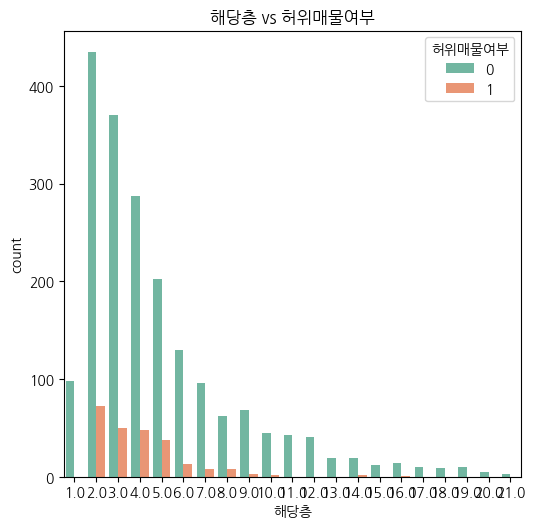

In [ ]:
plt.figure(figsize=(15, 10))
for ind, val in enumerate(['해당층']):
    plt.subplot(2, 3, ind + 1)
    sns.countplot(data=train, x=val, hue='허위매물여부', palette='Set2')
    plt.title(f'{val} vs 허위매물여부')

plt.tight_layout()
plt.show()


<ipython-input-42-298b07365f17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '총층', palette = 'Set2')


Text(0.5, 1.0, '총층')

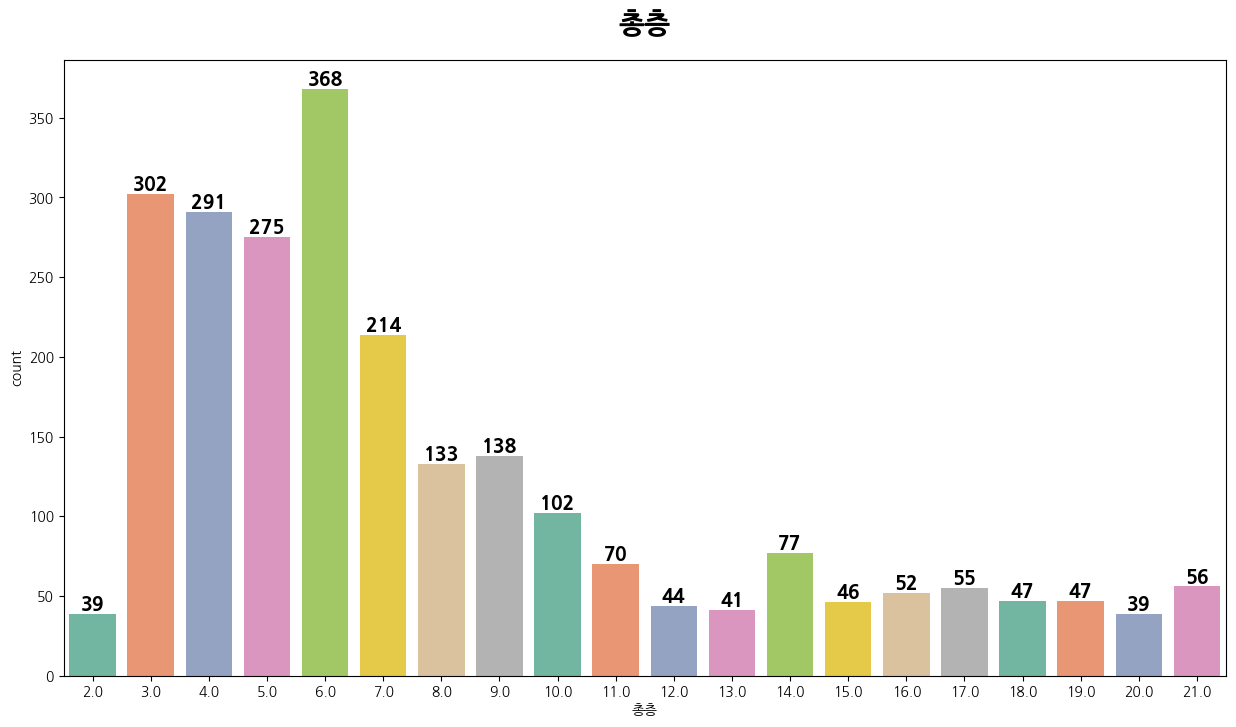

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '총층', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("총층",fontweight="black",size=20,pad=20)

<ipython-input-43-30d0d0690beb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '방향', palette = 'Set2')


Text(0.5, 1.0, '방향')

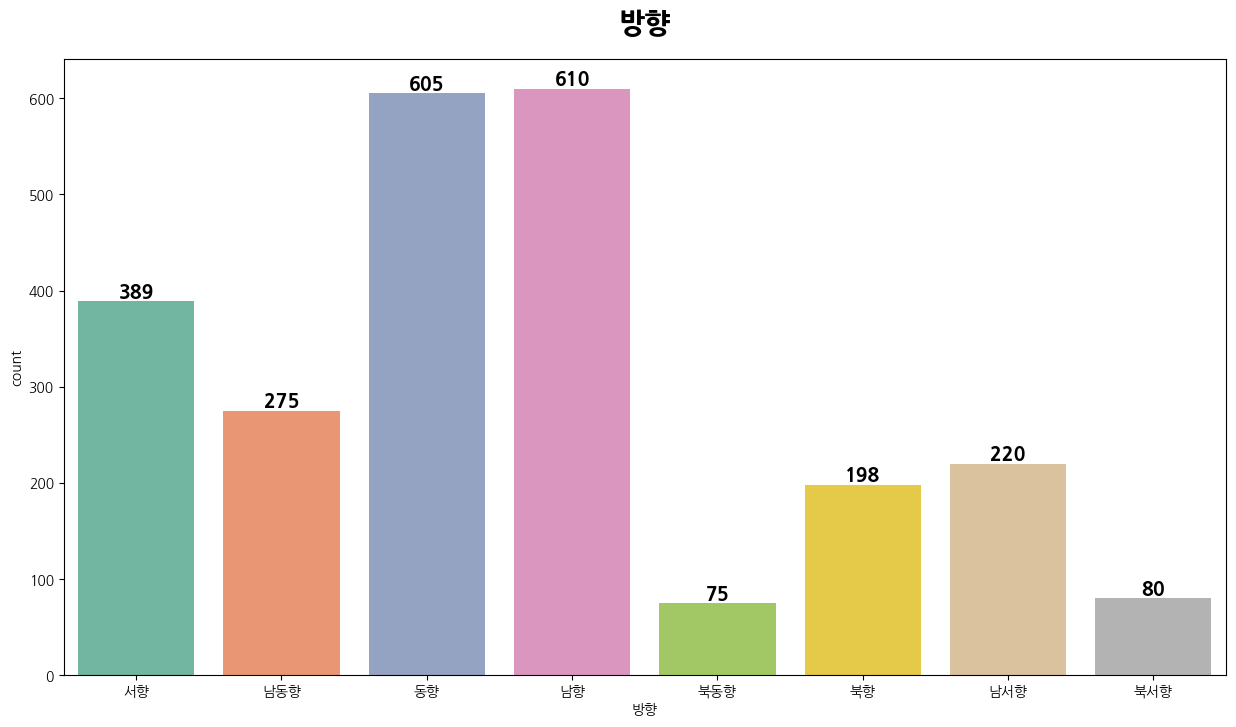

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '방향', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("방향",fontweight="black",size=20,pad=20)

In [ ]:
count_per_category = train.groupby('방향')['허위매물여부'].value_counts().unstack(fill_value=0)

# 비율 계산
ratio_per_category = count_per_category.div(count_per_category.sum(axis=1), axis=0)

# 결과 출력
print("개수:")
print(count_per_category)

print("\n비율:")
print(ratio_per_category)

개수:
허위매물여부    0   1
방향             
남동향     248  27
남서향     196  24
남향      570  40
동향      552  53
북동향      71   4
북서향      72   8
북향      135  63
서향      310  79

비율:
허위매물여부         0         1
방향                        
남동향     0.901818  0.098182
남서향     0.890909  0.109091
남향      0.934426  0.065574
동향      0.912397  0.087603
북동향     0.946667  0.053333
북서향     0.900000  0.100000
북향      0.681818  0.318182
서향      0.796915  0.203085


<ipython-input-45-ebc2a00f6812>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '방수', palette = 'Set2')


Text(0.5, 1.0, '방수')

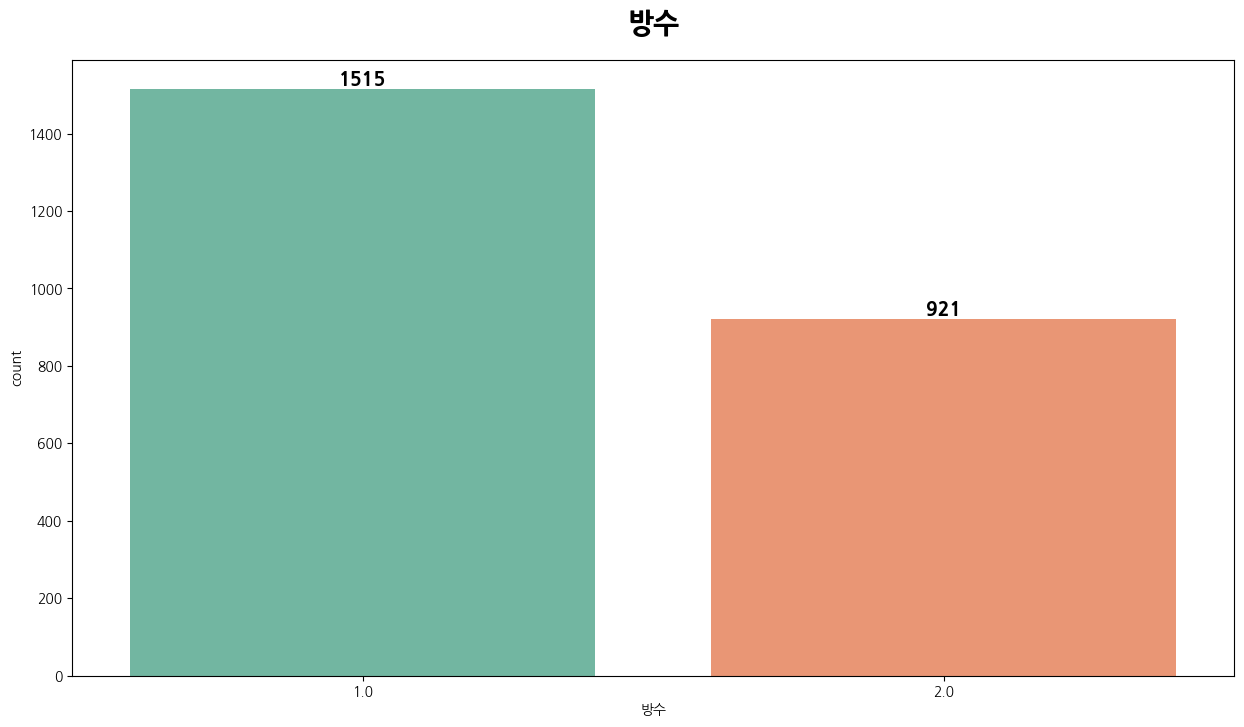

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '방수', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("방수",fontweight="black",size=20,pad=20)

<ipython-input-46-141c47ca1692>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='방수', y='전용면적', palette="Set2")


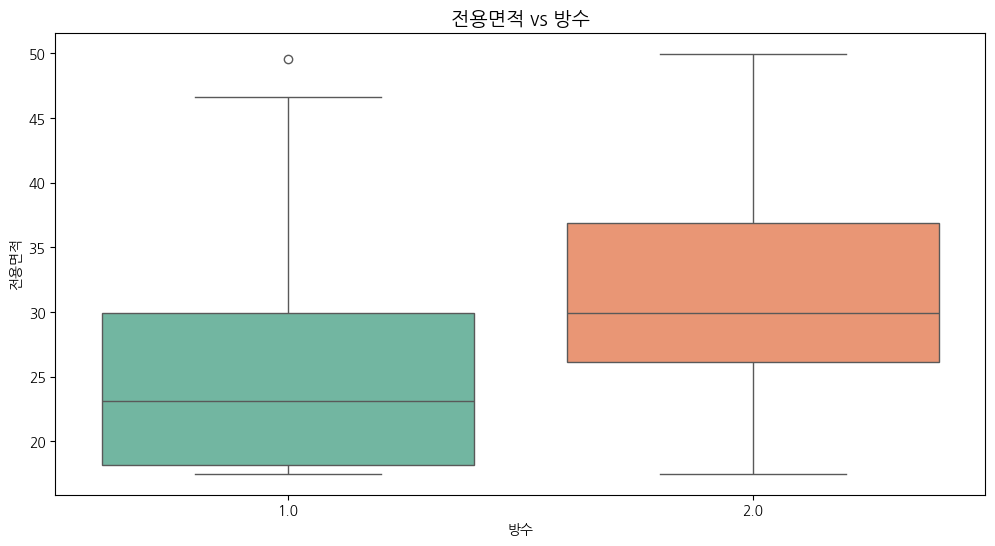

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='방수', y='전용면적', palette="Set2")
plt.title("전용면적 vs 방수", fontsize=14)
plt.show()

<ipython-input-52-6af36ebf76a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '욕실수', palette = 'Set2')


Text(0.5, 1.0, '욕실수')

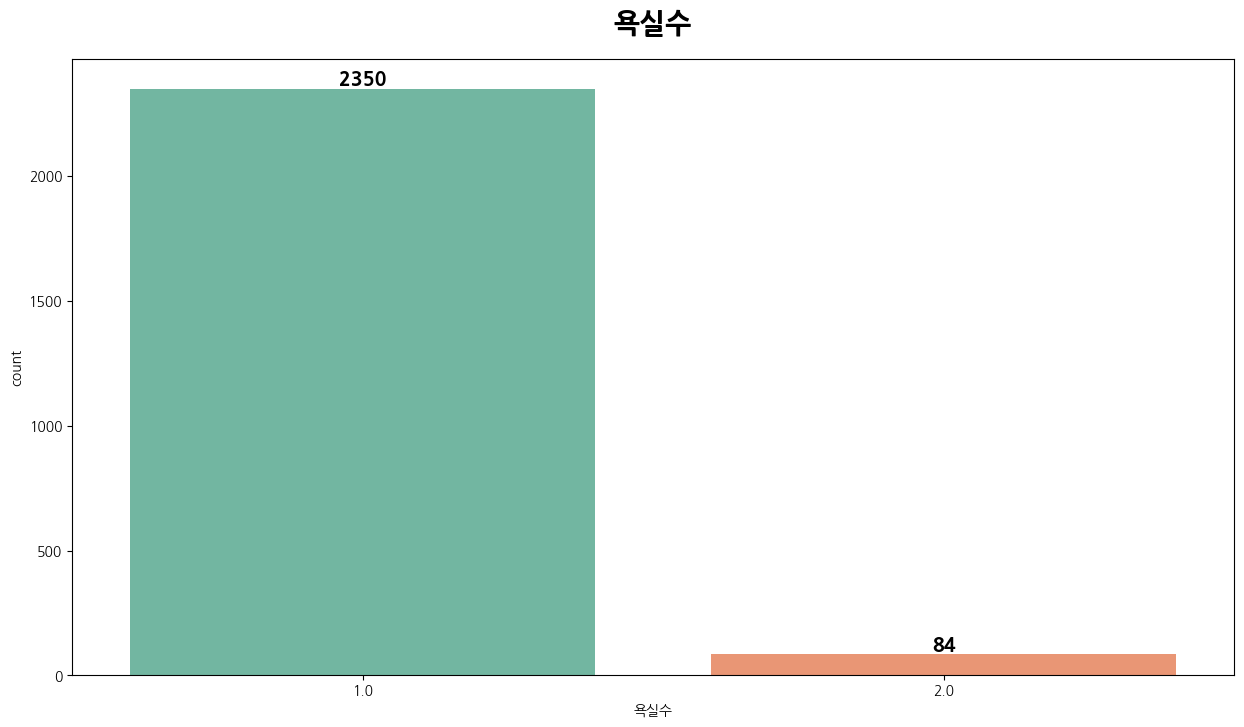

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '욕실수', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("욕실수",fontweight="black",size=20,pad=20)

In [ ]:
bathroom_2 = train[train['욕실수'] == 2]
print(bathroom_2['방수'].value_counts())

방수
2.0    84
Name: count, dtype: int64


<ipython-input-55-a79757a1abec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bathroom_2, x='방수', y='전용면적', palette="Set2")


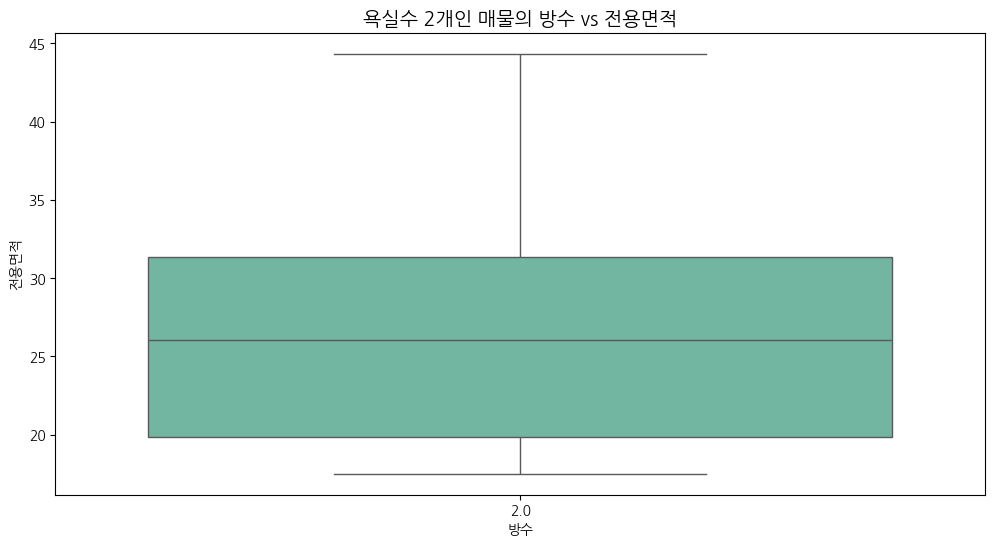

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bathroom_2, x='방수', y='전용면적', palette="Set2")
plt.title("욕실수 2개인 매물의 방수 vs 전용면적", fontsize=14)
plt.show()


<ipython-input-57-f021c616764d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '주차가능여부', palette = 'Set2')


Text(0.5, 1.0, '주차가능여부')

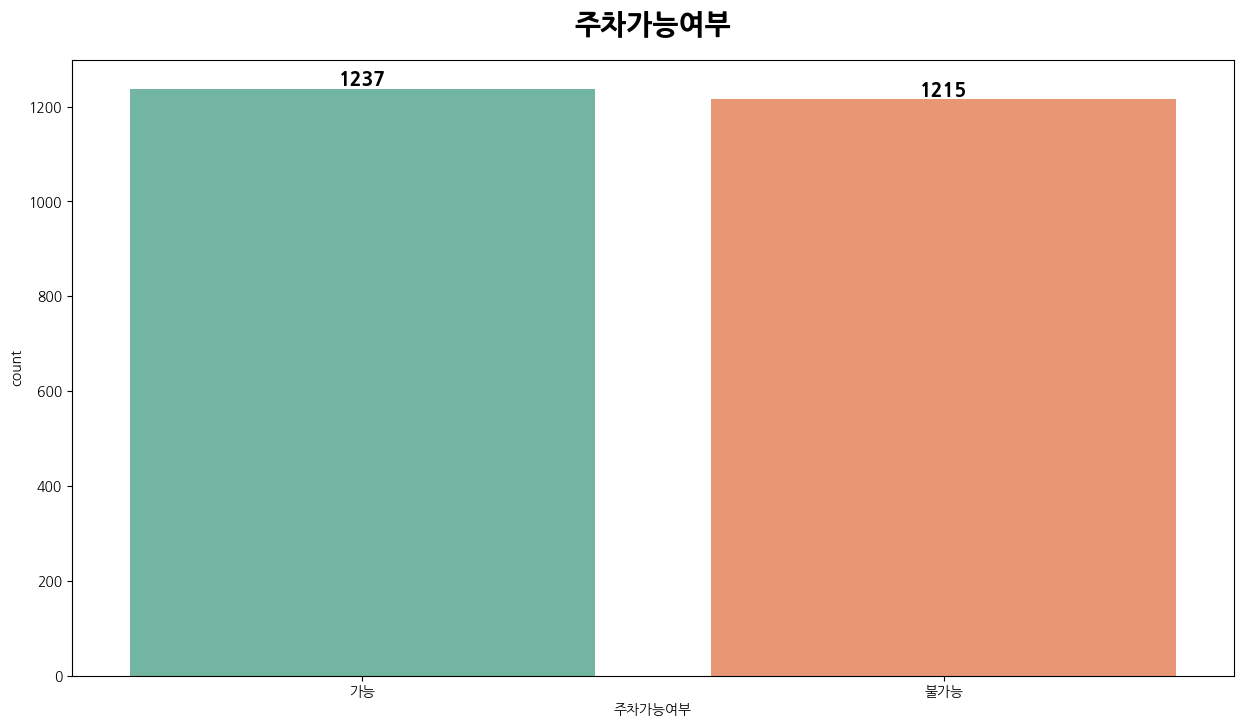

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '주차가능여부', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("주차가능여부",fontweight="black",size=20,pad=20)

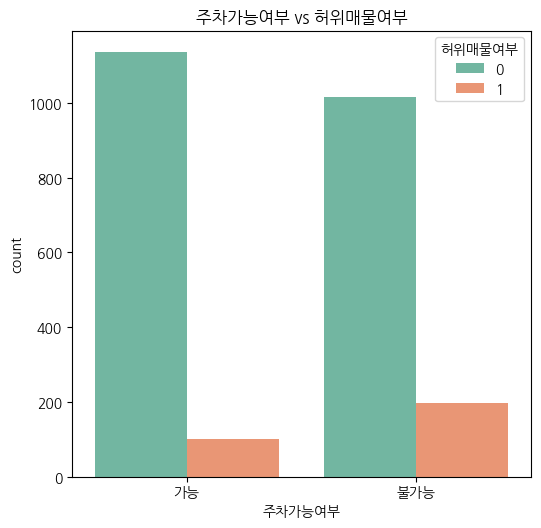

In [ ]:
plt.figure(figsize=(15, 10))
for ind, val in enumerate(['주차가능여부']):
    plt.subplot(2, 3, ind + 1)
    sns.countplot(data=train, x=val, hue='허위매물여부', palette='Set2')
    plt.title(f'{val} vs 허위매물여부')

plt.tight_layout()
plt.show()

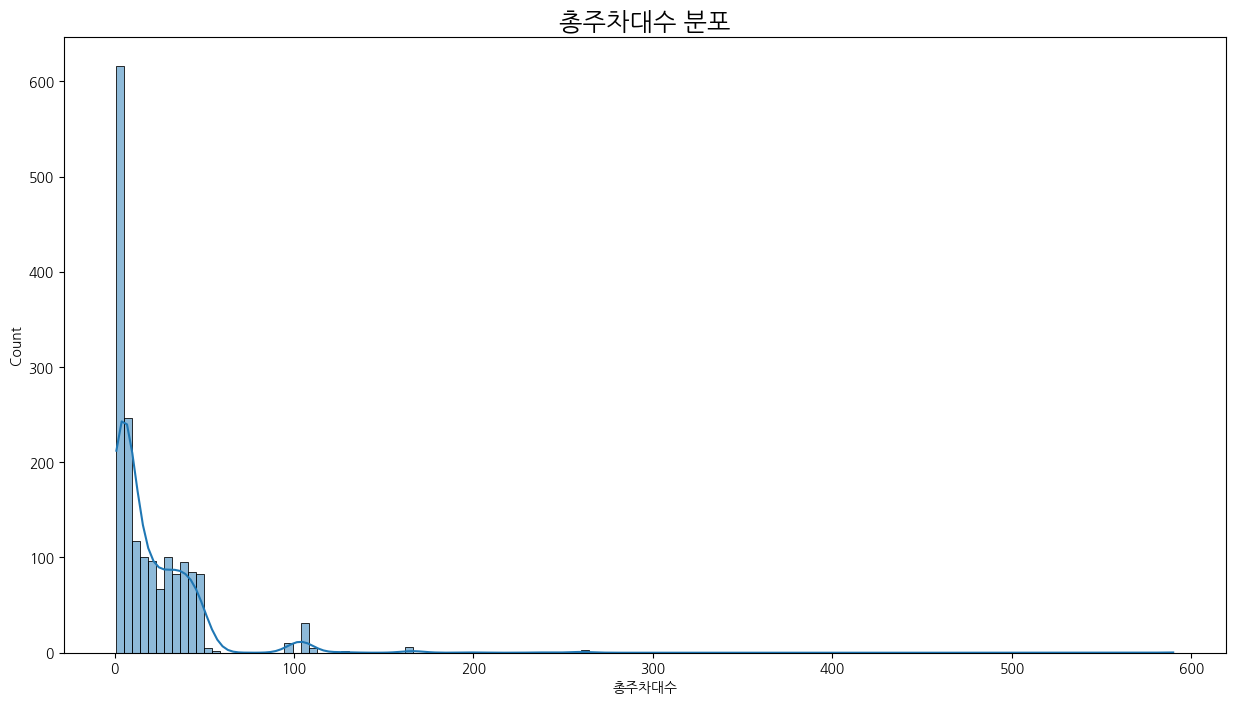

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = '총주차대수', kde = True)
plt.title('총주차대수 분포', size = 18)
plt.show()

In [ ]:
train['총주차대수'].describe()

,총주차대수
count,1756.000000
mean,20.332574
std,28.939900
min,1.000000
25%,4.000000
50%,10.000000
75%,31.000000
max,590.000000


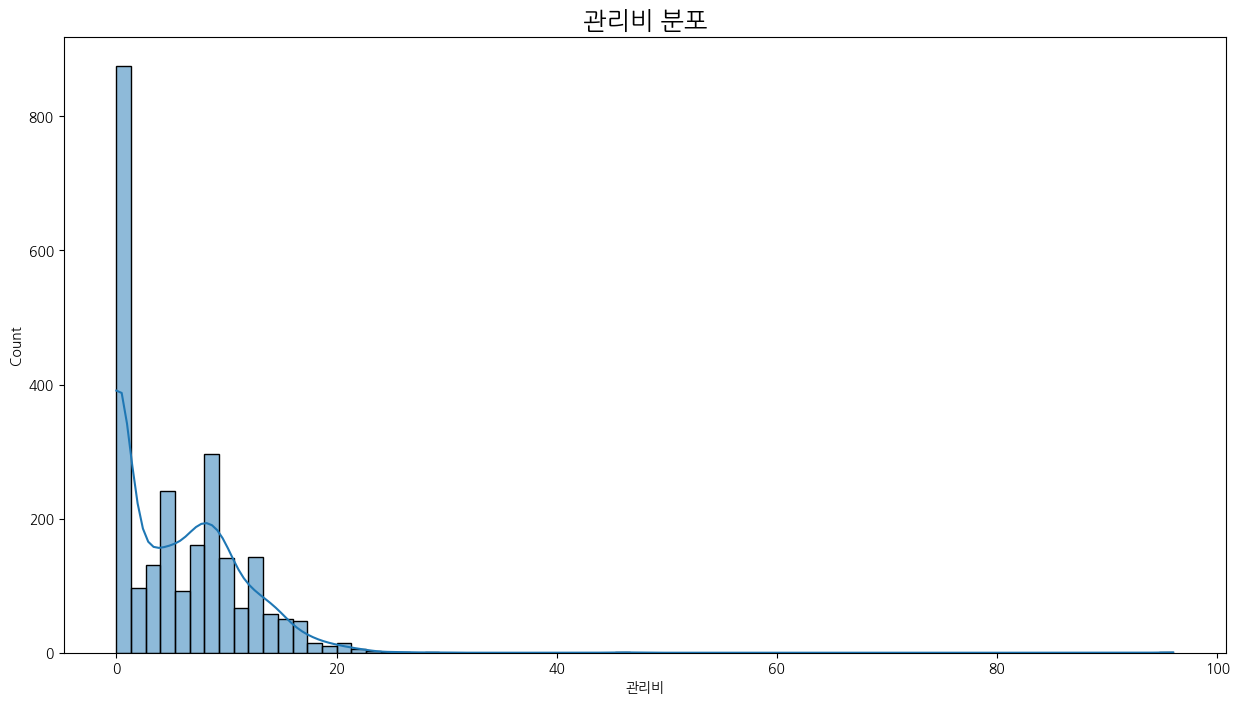

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = '관리비', kde = True)
plt.title('관리비 분포', size = 18)
plt.show()

In [ ]:
train['관리비'].describe()

,관리비
count,2452.000000
mean,5.477977
std,5.631185
min,0.000000
25%,0.000000
50%,5.000000
75%,9.000000
max,96.000000


<ipython-input-66-7c8d0d7dfb4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = '제공플랫폼', palette = 'Set2')


Text(0.5, 1.0, '제공플랫폼')

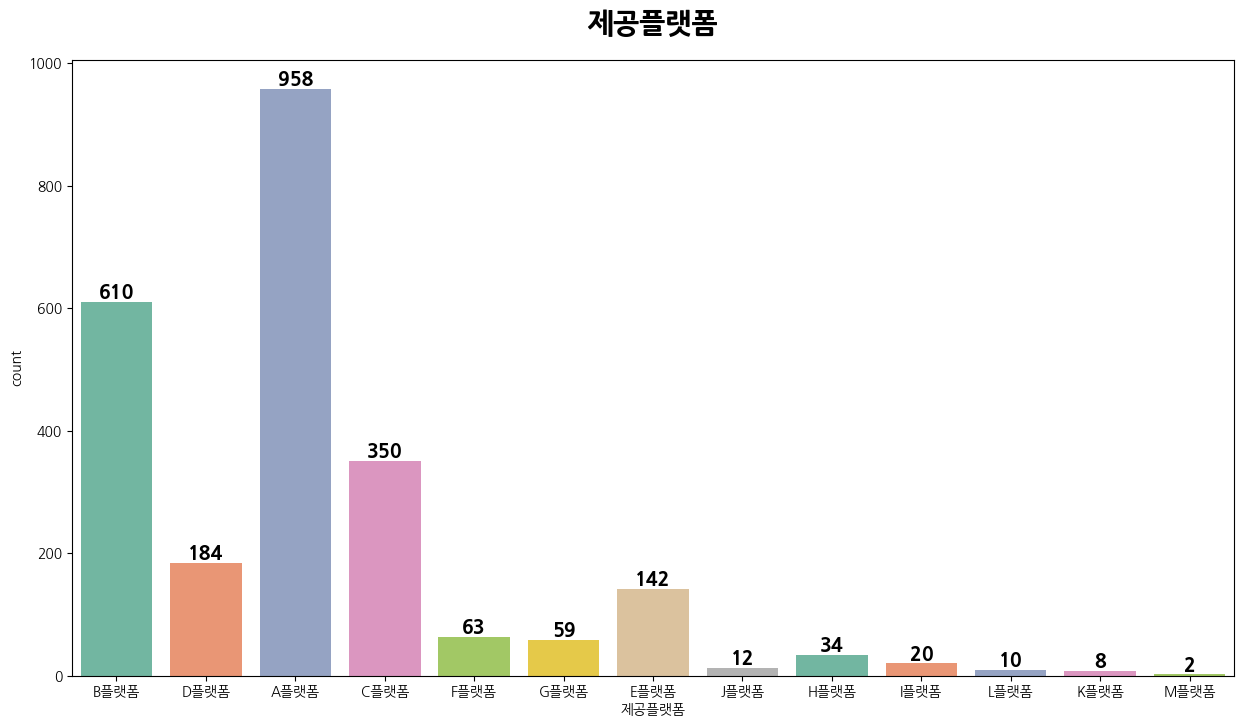

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = '제공플랫폼', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("제공플랫폼",fontweight="black",size=20,pad=20)

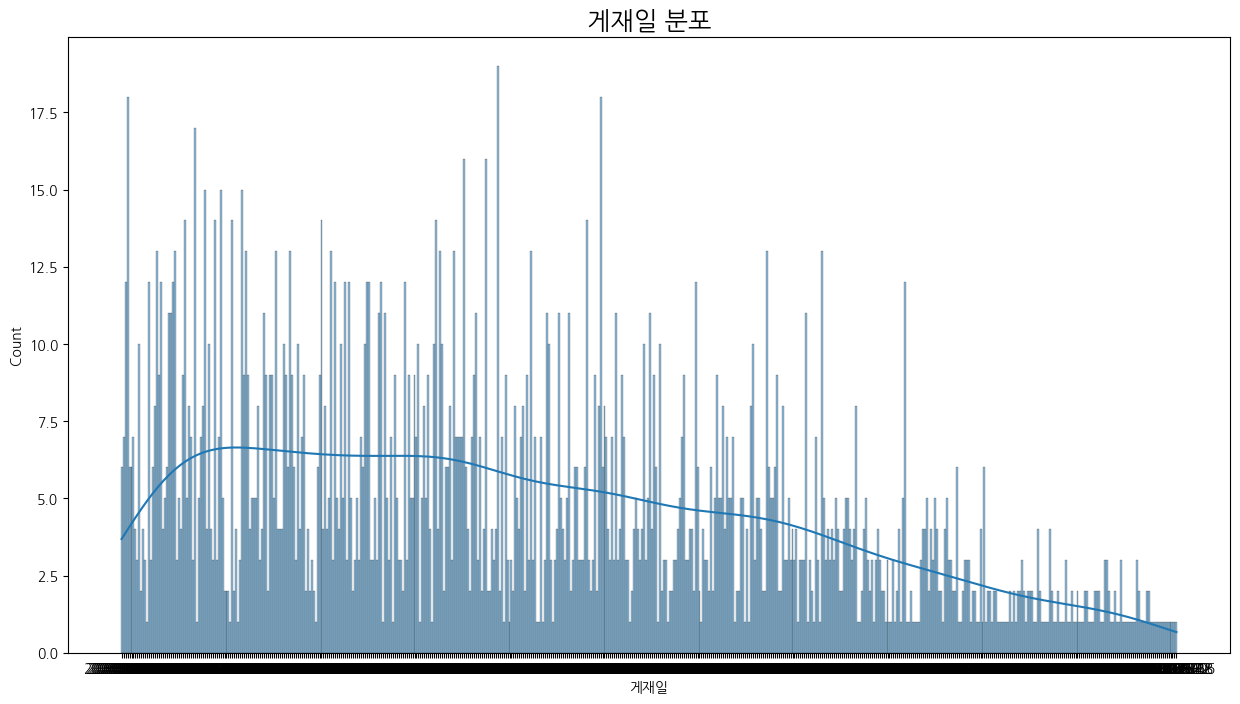

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = '게재일', kde = True)
plt.title('게재일 분포', size = 18)
plt.show()

### 2. Feature Importance

<ipython-input-18-31827a503017>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")


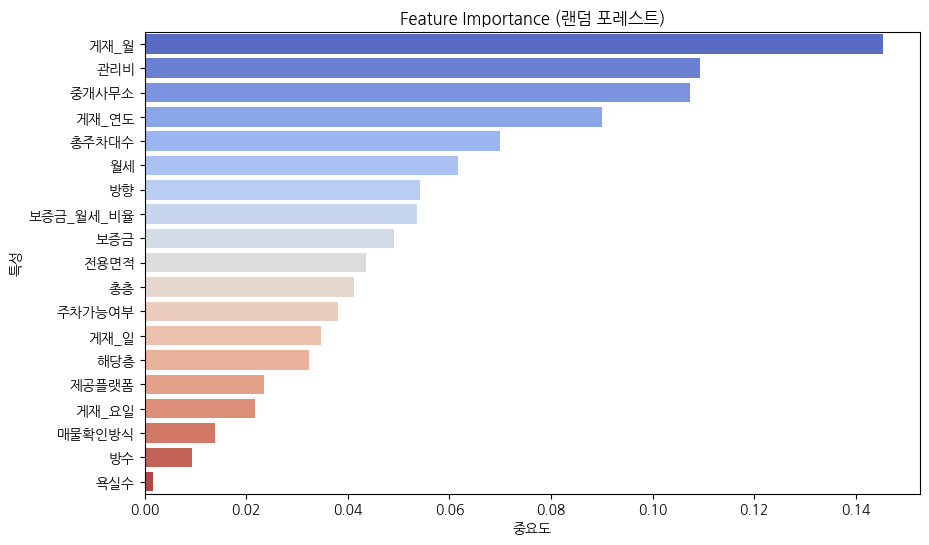

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

target = '허위매물여부'


train_encoded = train.copy()

train_encoded['게재일'] = pd.to_datetime(train_encoded['게재일'], errors='coerce')
train_encoded['게재_연도'] = train_encoded['게재일'].dt.year
train_encoded['게재_월'] = train_encoded['게재일'].dt.month
train_encoded['게재_일'] = train_encoded['게재일'].dt.day
train_encoded['게재_요일'] = train_encoded['게재일'].dt.weekday

train_encoded.drop(['ID', '게재일'], axis=1, inplace=True)

categorical_features = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼', '게재_요일']
for col in categorical_features:
    train_encoded[col] = LabelEncoder().fit_transform(train_encoded[col])

# 🔹 데이터 분리
X = train_encoded.drop(columns=[target])
y = train_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 랜덤 포레스트 모델 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔹 Feature Importance 추출
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 🔹 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance (랜덤 포레스트)")
plt.xlabel("중요도")
plt.ylabel("특성")
plt.show()


In [ ]:
import statsmodels.api as sm

X = train[['보증금', '월세', '관리비']]
y = train['허위매물여부']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.359973
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 허위매물여부   No. Observations:                 2452
Model:                          Logit   Df Residuals:                     2448
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                 0.02702
Time:                        07:37:56   Log-Likelihood:                -882.65
converged:                       True   LL-Null:                       -907.16
Covariance Type:            nonrobust   LLR p-value:                 1.290e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6856      0.177    -15.190      0.000      -3.032      -2.339
보증금         5.092e-10   5.06e

### 3. 상관계수

In [ ]:
from scipy.stats import pearsonr

def corr_pval(df, col1, col2):
    corr, p_value = pearsonr(df[col1], df[col2])
    return f"{corr:.3f} (p={p_value:.5f})"

results = {
    ("보증금", "월세"): corr_pval(train, "보증금", "월세"),
    ("보증금", "관리비"): corr_pval(train, "보증금", "관리비"),
    ("월세", "관리비"): corr_pval(train, "월세", "관리비"),
}

for key, value in results.items():
    print(f"{key[0]} vs {key[1]}: {value}")


보증금 vs 월세: 0.009 (p=0.65586)
보증금 vs 관리비: 0.055 (p=0.00685)
월세 vs 관리비: -0.074 (p=0.00023)


### 4. Feature Enginnering

In [ ]:
train['보증금_월세_비율'] = train['월세'] / train['보증금']
train['보증금_월세_비율'] = train['보증금_월세_비율'].replace([np.inf, -np.inf], 0)  # 무한대 값 방지
train['보증금_월세_비율'] = train['보증금_월세_비율'].fillna(0)  # NaN 값 0으로 대체

train[['보증금', '월세', '보증금_월세_비율']].head()

,보증금,월세,보증금_월세_비율
0,402500000.0,470000,0.001168
1,170500000.0,200000,0.001173
2,114000000.0,380000,0.003333
3,163500000.0,30000,0.000183
4,346000000.0,530000,0.001532


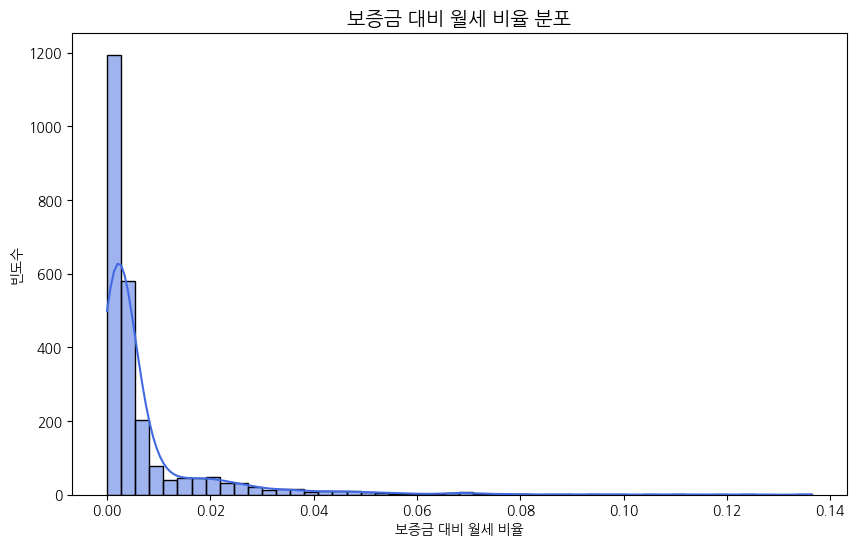

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['보증금_월세_비율'], bins=50, kde=True, color="royalblue")
plt.title("보증금 대비 월세 비율 분포", fontsize=14)
plt.xlabel("보증금 대비 월세 비율")
plt.ylabel("빈도수")
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

corr_pearson, p_pearson = pearsonr(train['보증금_월세_비율'], train['허위매물여부'])
corr_spearman, p_spearman = spearmanr(train['보증금_월세_비율'], train['허위매물여부'])

print(f"피어슨 상관계수: {corr_pearson:.3f}, p-value: {p_pearson:.5f}")
print(f"스피어만 상관계수: {corr_spearman:.3f}, p-value: {p_spearman:.5f}")

# 해석
if p_pearson < 0.05:
    print("피어슨: 유의미한 변수일 가능성 있음!")
else:
    print("피어슨: 허위매물과 관계 없음.")

if p_spearman < 0.05:
    print("스피어만: 유의미한 변수일 가능성 있음!")
else:
    print("스피어만: 허위매물과 관계 없음.")


피어슨 상관계수: 0.003, p-value: 0.87559
스피어만 상관계수: -0.009, p-value: 0.66482
피어슨: 허위매물과 관계 없음.
스피어만: 허위매물과 관계 없음.


In [ ]:
from scipy.stats import ttest_ind

real_estate = train[train['허위매물여부'] == 0]['보증금_월세_비율']
fake_estate = train[train['허위매물여부'] == 1]['보증금_월세_비율']

t_stat, p_value = ttest_ind(real_estate, fake_estate, equal_var=False)

print(f"t-검정 통계량: {t_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("보증금 대비 월세 비율이 허위매물 여부와 유의미한 차이가 있음!")
else:
    print("보증금 대비 월세 비율이 허위매물 여부와 차이가 없음.")


t-검정 통계량: -0.155, p-value: 0.87725
보증금 대비 월세 비율이 허위매물 여부와 차이가 없음.


In [ ]:
import statsmodels.api as sm

# 독립 변수 & 종속 변수 설정
X = train[['보증금_월세_비율']]
y = train['허위매물여부']

X = sm.add_constant(X)

# 로지스틱 회귀 모델 훈련
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 확인
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.369964
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 허위매물여부   No. Observations:                 2452
Model:                          Logit   Df Residuals:                     2450
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               1.339e-05
Time:                        07:35:48   Log-Likelihood:                -907.15
converged:                       True   LL-Null:                       -907.16
Covariance Type:            nonrobust   LLR p-value:                    0.8762
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9832      0.070    -28.216      0.000      -2.121      -1.845
보증금_월세_비율      0.6991      4.